# Summary:
As previously explained, there are two parts to how a movement between point A and point B might vary. The second part is the speed of the movement. Here, I calculate the average speed, `s`, of each __Hit__ trial's movement, defined as $\frac{100}{\text{time}}$ in units of % movement/s. I then find the mean of these average speeds, `mean_s`, and variance of these average speeds, `var_s`, across all trials for the day.

# What should be in analysis4:
- mean_ss.npy the mean speed of movement completion across days
- var_ss.npy the Var[speed] of movement completion across days

### imports and plot settings

In [34]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

In [35]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams["figure.autolayout"] = True

### set `folder_name`

In [36]:
name = "ANA2"

In [37]:
output_folder = "../Data_Copy/AnalysisData/"+name+"/analysis4_"+name+"/"
!mkdir {output_folder}

### sort through relevant .mat files found in folder by day ("_d#")

In [38]:
unsorted_analysis1_folders = glob.glob('../Data_Copy/AnalysisData/'+name+'/analysis1_'+name+'_*/')
sorted_analysis1_folders = sorted(unsorted_analysis1_folders, key=lambda x: int(re.search(r'd(.*?)(?:_|$)',x).group()[1]))
# check
sorted_analysis1_folders

['../Data_Copy/AnalysisData/ANA2/analysis1_ANA2_20231101_d6/']

### Get `var_s` and `mean_s`
- For each day, go to corresponding analysis2 folder
    - Find `mean_s` and `var_s` for that day:
        - For each movement from that day, get the total time it took to do the entire movement
        - Calculate an overall average speed defined as $\frac{100}{\text{time}}$ in units of % movement/s
    - Then, find the variance and mean of these average speeds, `var_s` and `mean_s`, respectively, for all movements from a day
    - Append to `vars_vs` and `mean_ss`

In [39]:
var_ss = []
mean_ss = []
num_ss = []
# loop through all analysis2 folders for each day
for analysis1_folder in sorted_analysis1_folders:

    vs = []
    # loop through all movements from that day
    for movement_file in glob.glob(analysis1_folder+'movement_trial*.npy'):
        movement_data = np.load(movement_file)
        time = (movement_data[0, -1] - movement_data[0, 0])
        vs.append(100 / time)

    #print("maximum time to complete movement:", 100 / np.min(vs), 's')
    #print("minimum time to complete movement: ", 100 / np.max(vs), 's')
    var_ss.append(np.var(vs))
    mean_ss.append(np.mean(vs))
    num_ss.append(len(vs))
    
var_ss = np.array(var_ss)
mean_ss = np.array(mean_ss)
num_ss = np.array(num_ss)

### Plot `var_ss` and `mean_ss` across days

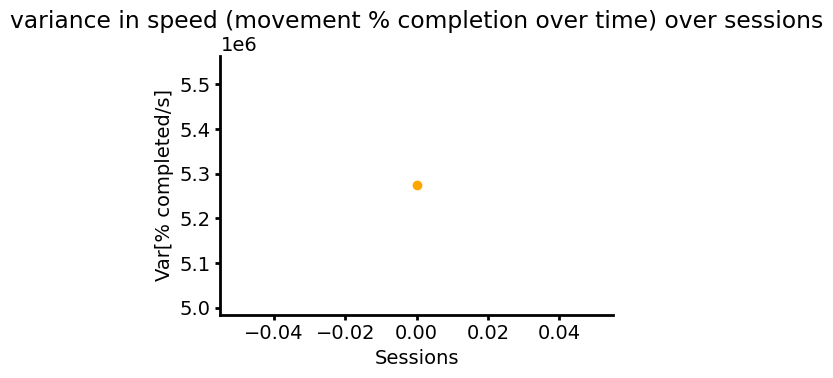

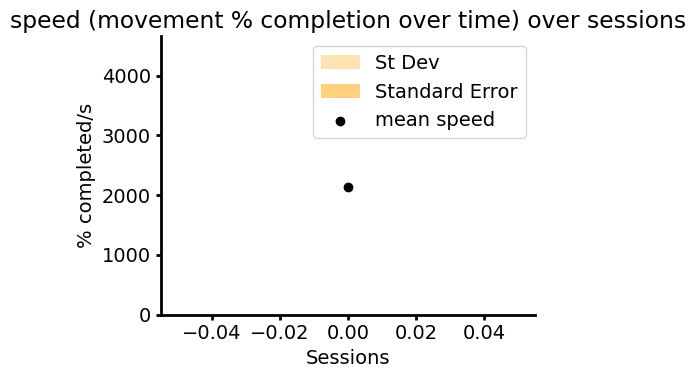

In [40]:
x_range = range(0, len(mean_ss))
std = np.sqrt(var_ss)
standard_error = np.sqrt(var_ss) / num_ss

plt.scatter(x_range, var_ss, color='orange')
plt.title('variance in speed (movement % completion over time) over sessions')
plt.ylabel("Var[% completed/s]")
plt.xlabel("Sessions")
plt.show()

plt.fill_between(x_range, mean_ss+std, mean_ss-std, color='orange', alpha=0.3, label='St Dev', zorder=1, linewidth=0.0)
plt.fill_between(x_range, mean_ss+standard_error, mean_ss-standard_error, color='orange', alpha=0.5, label='Standard Error', zorder=1, linewidth=0.0)
plt.plot(x_range, mean_ss, color='black', zorder=3)
plt.scatter(x_range, mean_ss, label="mean speed", color='black', zorder=3)
plt.title('speed (movement % completion over time) over sessions')
plt.ylabel('% completed/s')
plt.xlabel("Sessions")
plt.legend()
plt.ylim(bottom=0)
plt.show()

Save `var_ss` and `mean_ss`

In [41]:
np.save(output_folder+"var_ss", var_ss)
np.save(output_folder+"mean_ss", mean_ss)